# Contour-based filtering

In [1]:
import matlab.engine
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.benchmark_utils import MatlabInterface
from methods.method_contour_filtering import NewMethod
import sys
import os

In [2]:
# A test for new methods
np.random.seed(0) 

# signal parameters
SNRin = 30
N = 2**11
Nsub=N//2
sbank = SignalBank(N=N, Nsub=Nsub, return_signal=True)
s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_cos_plus_tone()
# s = sbank.signal_mc_modulated_tones()
# s = sbank.signal_mc_synthetic_mixture()
s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_impulses()
signal, noise = add_snr(s,SNRin)
# signal = s + noise*np.sqrt(N/Nsub) 

snr_out:30.0


In [3]:

Nfft = 2*N
g,_ = get_round_window(Nfft)
S, F, stft_padded, Npad = get_spectrogram(signal, window = g)

methodml = NewMethod()
funa = methodml.method
signal_output = funa(signal,signal.total_comps)

S_output, F_output, _, _ = get_spectrogram(signal_output, window = g)

print(10*np.log10((np.sum(s**2))/(np.sum((s-signal_output)**2))))

7.254975886090716


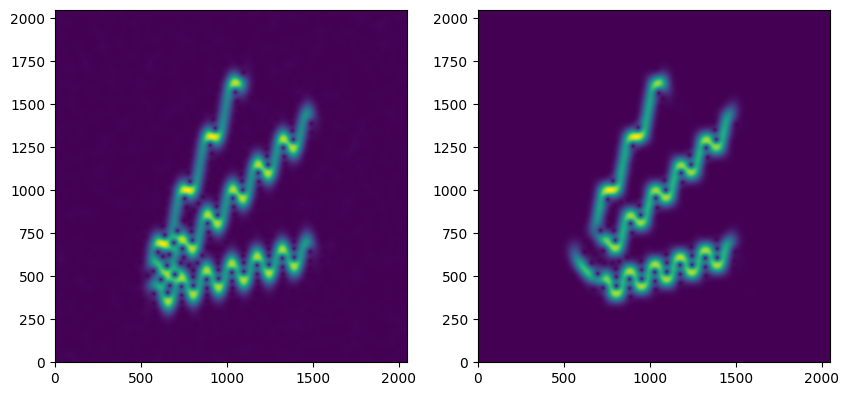

In [4]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
plt.show()
